# House Price Prediction API

The client is interested in forecasting house s so the company can look to invest. Rather than using a registrated valuer the're looking for something which can be done using the latest technology. Jamie has collected some data on existing house prices over the last few years and has asked to see what you can do.

# 1. Import Data

In [1]:
!pip install pandas scikit-learn xgboost dill

  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached scikit_learn-1.2.1-cp310-cp310-win_amd64.whl (8.3 MB)
     ---------------------------------------- 0.0/89.1 MB ? eta -:--:--
     ---------------------------------------- 0.3/89.1 MB 10.6 MB/s eta 0:00:09
     ---------------------------------------- 0.9/89.1 MB 11.9 MB/s eta 0:00:08
     ---------------------------------------- 1.0/89.1 MB 11.0 MB/s eta 0:00:09
      --------------------------------------- 1.5/89.1 MB 8.5 MB/s eta 0:00:11
     - -------------------------------------- 2.4/89.1 MB 11.0 MB/s eta 0:00:08
     - -------------------------------------- 3.7/89.1 MB 13.9 MB/s eta 0:00:07
     -- ------------------------------------- 5.1/89.1 MB 16.3 MB/s eta 0:00:06
     -- ------------------------------------- 6.5/89.1 MB 18.1 MB/s eta 0:00:05
     --- ------------------------------------ 7.9/89.1 MB 19.5 MB/s eta 0:00:05
     ---- ----------------------------------- 9.3/89.1 MB 20.6 MB/s eta 0:00

- Pandas: Tabular data preprocessing (csv, excel Files)
- Scikit-learn: Machine Learning 
- Xgboost: Highly Performent Machine Learning Algorithms 
- Dill: Serilisation Libary 

In [1]:
import pandas as pd

In [2]:
# Load in Data
df = pd.read_csv('regressiondata.csv', index_col='ID')

In [3]:
# Displays the first five rows of data
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [4]:
# Displays the last five rows of data
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [5]:
# Get a specific row
df.iloc[9351]

TransactionDate        2019.07
HouseAge                  36.0
DistanceToStation    554.32482
NumberOfPubs               3.0
PostCode                5217.0
HousePrice              420246
Name: 9351, dtype: object

# 2. Split Data to Prevent Snooping Bias

This is done before bulding the model to decrease the risk of obtaining artificial satistical significant results because asumtions where made on the entire Dataset. Solitting the data bevore data analysis lets us analyse the data using the same data it will be trained on.

In [6]:
# Import splitting function
from sklearn.model_selection import train_test_split

In [7]:
# Split data into training and testing
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [8]:
type(train)

pandas.core.frame.DataFrame

In [9]:
# See training partition
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


The Id's are not in the right order anymore because the data was split randomly

# 3. Exploritory Data Analysis

Goals of exploritory data analysis
- Analysing the distrobution of numerical and categorical variables to find skeewed data or outliers
- Looking for missing data or incorrectly labeld data
- Reviwing the relationship inbetween variables

## Bird's Eye View 

In [10]:
# Get Datatypes of the columns
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

- Transaction Date: Schould be Split into Month and Year 
- House Age: Ok as float
- Distance to Station: Ok as float
- Post Code: Should be string not float (Higher Postcodes are not necessary better than lower ones)
- House Price: Should be float not a string

In [11]:
# Get information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


- 6549 total rows of the dtatframe fith 6 columns (5 features and 1 target)
- 1 to 5 Missing values per column(null values)

In [12]:
# Create summary statistics
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


- Count all non null values
- Standerd deviation for the number of Pubs (76000) seems unresonable
- There is a house with roghly 5 million pubs nearby this seems to be a data error

In [13]:
# Type cast incorrect datatypes to new datatypes
train['PostCode'] = train['PostCode'].astype(str)
train['TransactionDate'] = train['TransactionDate'].astype(str)

In [14]:
# This returns a pandas Series
type(train['PostCode'])

pandas.core.series.Series

In [15]:
# This returns a pandas Dataframe
type(train[['PostCode']])

pandas.core.frame.DataFrame

In [16]:
# Check if the typecasting has worked
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice            object
dtype: object

In [17]:
# Create summery statistics for nummeric features
train.describe()

,HouseAge,DistanceToStation,NumberOfPubs
count,6546.000000,6547.000000,6.547000e+03
mean,17.375344,1091.759504,7.677828e+02
std,11.469272,1270.038426,6.179430e+04
min,0.000000,23.829424,0.000000e+00
25%,9.000000,268.649033,1.000000e+00
50%,15.000000,545.312168,4.000000e+00
75%,28.000000,1529.343484,6.000000e+00
max,43.000000,6486.256457,4.999999e+06


In [18]:
# Create summery statistics for non-nummeric features
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


## Analyse Numerical Variables

### Plot Distributions

In [19]:
# Install dependencies
!pip install matplotlib seaborn

- Matplotlib: Baseline for al Graphing and Ploting
- Seaborn: Nice plots adds on to matplotlib

In [20]:
# Import data visulisation tools
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
# Show shape of data
train.shape

(6549, 6)

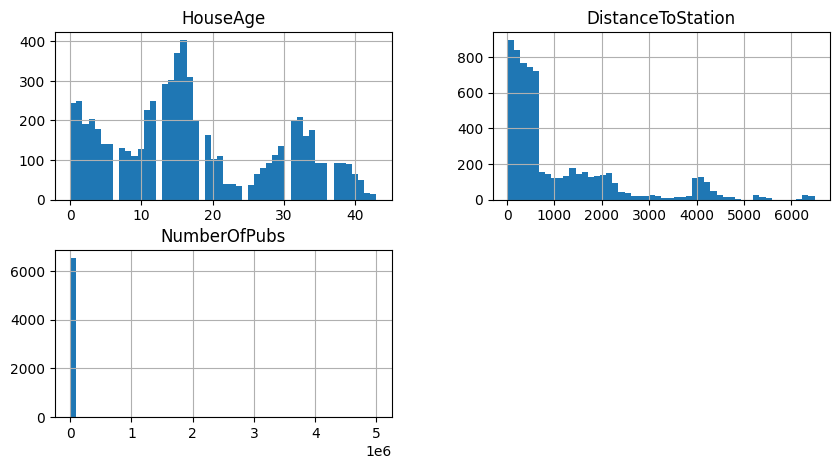

In [22]:
# Plot distributions
train.hist(figsize=(10,5), bins=50)
plt.show()

A hughe outlier in Number of Pubs is skeewing the data to the left

### Why isn't House Price showing up as Numeric?

In [23]:
# Convert Hose Price str -> float
train['HousePrice'] = train['HousePrice'].astype(float)

ValueError: could not convert string to float: '??'

We recive a ValueError: could not convert string to float: '??' \
The data contains a row where Hose Price is '??' this cant be cast to a numerical value

In [ ]:
# Filter Dataframe based on HosePrice == '??'
train[train['HousePrice'] == '??']

In [24]:
# Drop rows taht equal '??'
train = train[train['HousePrice'] != '??']

In [25]:
# Double check if the row has been droped
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [26]:
# Overwrite the House Price column with the converted column
train['HousePrice'] = train['HousePrice'].astype(float)

In [27]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

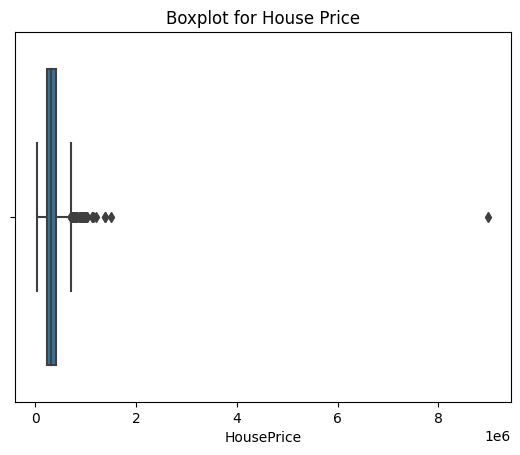

In [28]:
# Create a box plot for house prices
plt.title('Boxplot for House Price')
sns.boxplot(x=train['HousePrice'])
plt.show()

There seems to be a hughe outlier value which will hurt the performance of the machine learning models. \
Very expensive house like the outlier might require a seperate model

### Drop Outlier

In [29]:
# Identify the Outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


- There are missing values (NaN) in the last 5 rows
- There is a massive value of ~9 Million $ which is roghly 9 times larger than the 2nd most expensive house

These values will be droped, in the real world these changes should be highlighted and reported to the client. Prices for the rows with missing values could be found. In the case of the outlier a seperate model might have to be trained for predicting prices of very expensive houses, this would requrie more data on these types of properties.

In [30]:
train = train.drop(8445)

In [31]:
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


### What's happening with Pubs

In [32]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


- There are 2 missing values in the number of pubs
- Clearly there is a mistake where the number of pubs is set to 5 Million

In [33]:
train.drop(13, inplace=True)

In [34]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
3195,2020.11,32.0,324.371247,10.0,5614.0,488918.0
2996,2020.03,28.0,772.777219,10.0,5217.0,299235.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


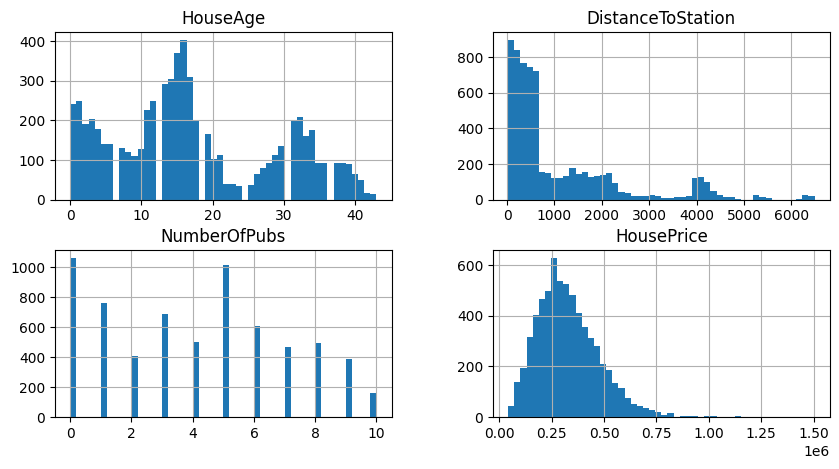

In [35]:
# Plot distributions
train.hist(figsize=(10,5), bins=50)
plt.show()

## Analyse Categorical Variables

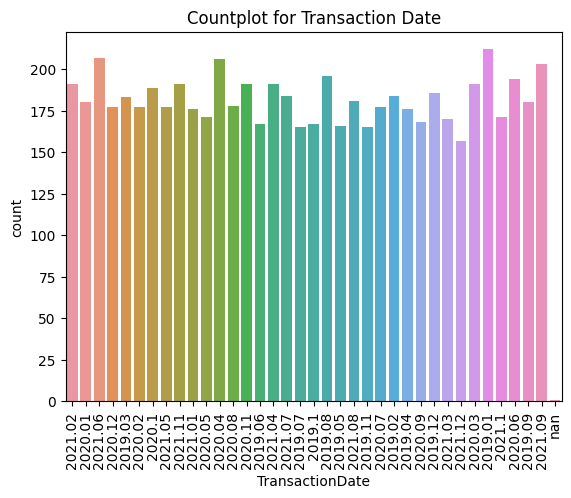

In [36]:
# Create countplot for transaction date
plt.title('Countplot for Transaction Date')
sns.countplot(x='TransactionDate', data=train)
plt.xticks(rotation=90)
plt.show()

The lables for the Transaction date are unorderd and do include a missing value (nan)

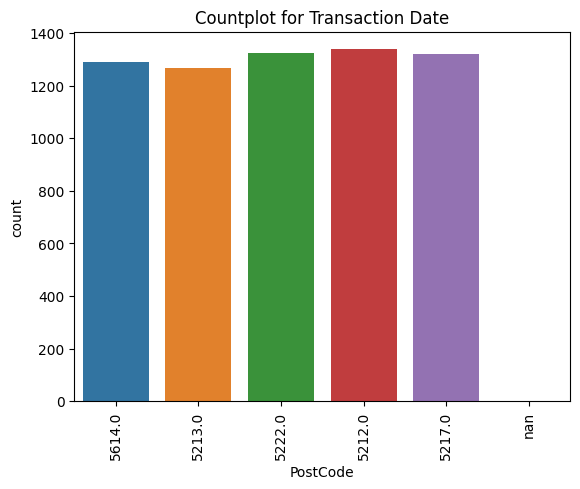

In [37]:
# Create countplot for Post code
plt.title('Countplot for Transaction Date')
sns.countplot(x='PostCode', data=train)
plt.xticks(rotation=90)
plt.show()

There are missing values in Post Code (nan)

## Analyse Relationships Numeric/Numeric

### Calculate Person's Corelation

In [38]:
# Calculate Person's Corelation
train.corr(numeric_only=True)

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
HouseAge,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.156693,-0.539859,0.452309,1.000000


The Correlation between two variables ranges from -1 to 1
- 0 - 1:  A postitive coorelation (e.g.: as the number of pubs goes up house price goes up)
- 0:      No correlation (e.g.: Distance to station dose not effect house age)
- -1 - 0: A negative correlation (e.g.: as house age goes up house price goes down)

We want:
- Strong Correaltion between features and the target variables
- Wak Correlations inbetween seperate features

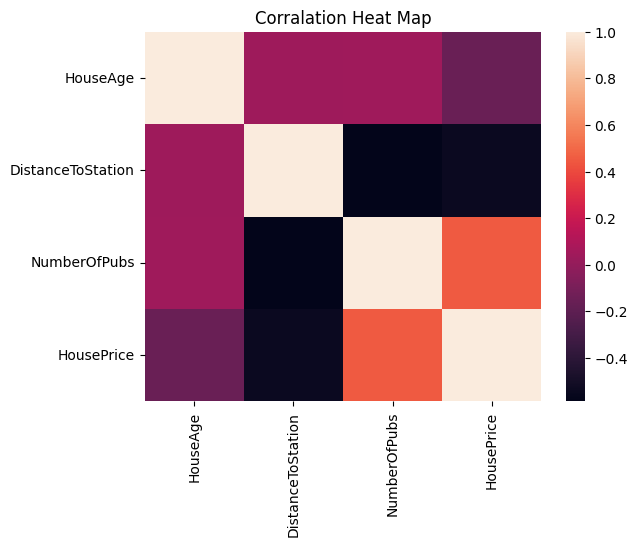

In [39]:
# Visulise correlation using a heatmap
plt.title('Corralation Heat Map')
sns.heatmap(train.select_dtypes(exclude='object').corr())
plt.show()

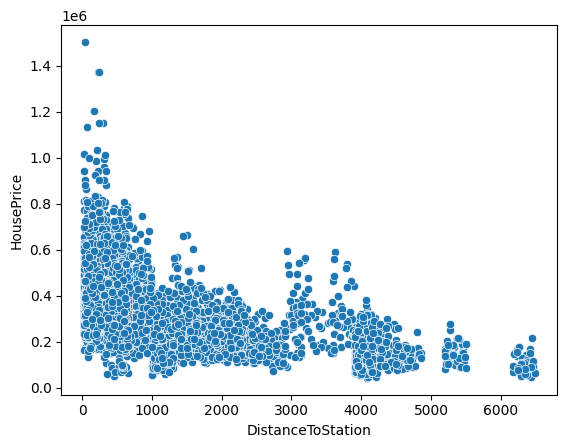

In [40]:
# Created a Scatter Plot
sns.scatterplot(x='DistanceToStation', y='HousePrice', data=train)
plt.show()

## Analyse Relationships Categorical/Numeric

### Is Post Code Driving Value?

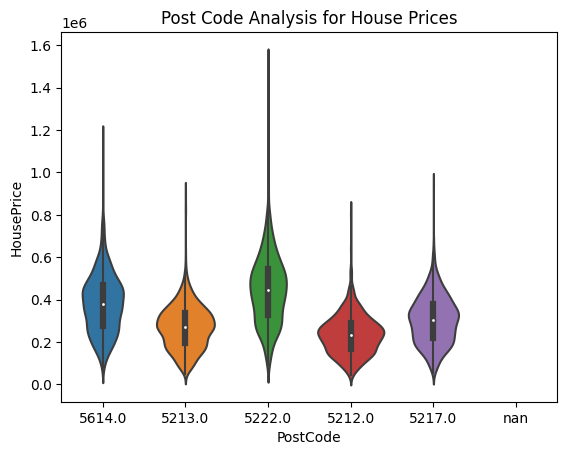

In [41]:
plt.title('Post Code Analysis for House Prices')
sns.violinplot(x='PostCode', y='HousePrice', data=train)
plt.show()

- Post codes 5213 and 5212 have prices mor tightly packed
- Post codes 5614 and 5217 have prices with a wider range
- Post code 5222 has the largest range and includes more expensive houses than the other post codes
- There are missing values (nan)

### What about the date it was sould?

In [42]:
# Check for nulls in a collumn
train[train['TransactionDate'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [43]:
# Check if a string 'nan' is in a column
train[train['TransactionDate'] == 'nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


In [44]:
# Drop missing house prices
train = train[~train['HousePrice'].isnull()]

In [45]:
# Check if a string 'nan' is in a column
train[train['TransactionDate'] == 'nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


Currently the Taransaction dat is represented as a string "YYYY.MM"

In [46]:
print('Transaction Year: ', int(train.iloc[0]['TransactionDate'][:4]))
print('Transaction Month: ', int(train.iloc[0]['TransactionDate'][5:]))

Transaction Year:  2021
Transaction Month:  2


In [47]:
# Apply string transformation on Transaction Date
train['YearSold'] = train['TransactionDate'].apply(lambda x: x[:4]).astype(int)
train['MonthSold'] = train['TransactionDate'].apply(lambda x: x[5:]).astype(int)

In [48]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice,YearSold,MonthSold
ID,,,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0,2021,2
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0,2020,1
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0,2021,6
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0,2020,12
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0,2019,3


In [49]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
YearSold               int32
MonthSold              int32
dtype: object

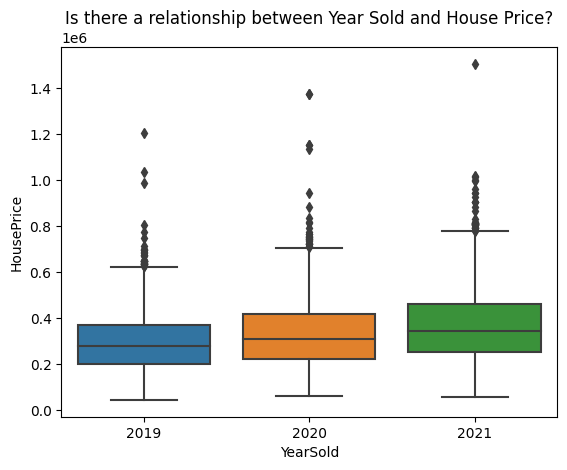

In [50]:
plt.title('Is there a relationship between Year Sold and House Price?')
sns.boxplot(x='YearSold', y='HousePrice', data=train)
plt.show()

Each Year the average price of sold houses has increased

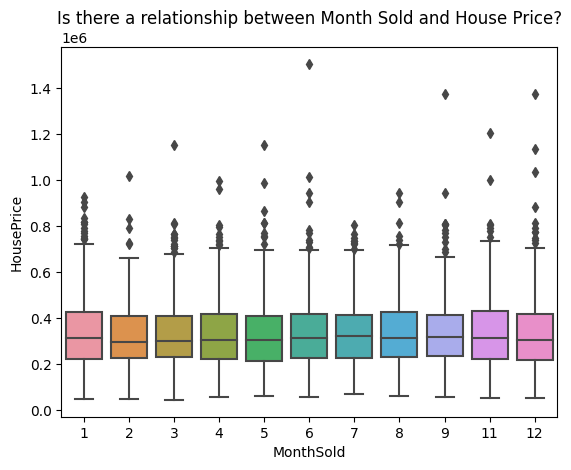

In [51]:
plt.title('Is there a relationship between Month Sold and House Price?')
sns.boxplot(x='MonthSold', y='HousePrice', data=train)
plt.show()

The trend of house prices slightly changes over the year (almost like a sin wave)

# 4. Data Preprocessing

Get data in a pure format for passing it into the machine learning model

## Build Preprocessing Function

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

### Simple Imputer example

In [53]:
# Using Simple Imputer
imputer = SimpleImputer()
imputer.fit(train[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
imputer.transform(train[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])

array([[3.40000000e+01, 4.60994365e+02, 8.00000000e+00],
       [1.70000000e+01, 6.14851833e+02, 3.00000000e+00],
       [3.40000000e+01, 2.85892687e+02, 9.00000000e+00],
       ...,
       [1.60000000e+01, 6.05834036e+02, 2.00000000e+00],
       [3.60000000e+01, 3.45823461e+01, 7.00000000e+00],
       [1.20000000e+01, 1.59998338e+03, 1.00000000e+00]])

In [54]:
train[train['HouseAge'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice,YearSold,MonthSold
ID,,,,,,,,
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0,2019,6
24,2019.01,NaN,NaN,4.0,5217.0,137921.0,2019,1


In [55]:
imputer.transform(train[train['HouseAge'].isnull()][['HouseAge', 'DistanceToStation', 'NumberOfPubs']])

array([[  17.37972167, 1091.84711209,    4.0735474 ],
       [  17.37972167, 1091.84711209,    4.        ]])

### Standard Scaler Example

In [56]:
train['HouseAge'].mean()

17.379721669980118

In [57]:
train['HouseAge'].std()

11.471006657798647

In [58]:
(34 - train['HouseAge'].mean()) / (train['HouseAge'].std())

1.4488944890220656

In [59]:
(16 - train['HouseAge'].mean()) / (train['HouseAge'].std())

-0.12027904011738184

### One Hot Encoder Example

In [60]:
onehot = OneHotEncoder()
onehot.fit(train[['PostCode']])

OneHotEncoder()

In [61]:
train['PostCode'].head()

ID
8450    5614.0
5758    5213.0
4030    5614.0
8447    5222.0
4370    5212.0
Name: PostCode, dtype: object

In [62]:
onehot.transform(train[['PostCode']]).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [63]:
onehot.get_feature_names_out()

array(['PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

### Preprocessing Class

In [64]:
class Preprocessor(BaseEstimator, TransformerMixin):
    # Train our custom preprocessors
    def fit(self, X, y=None):
        
        # Create and fit simple imputer
        self.imputer = SimpleImputer()
        self.imputer.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        # Create and fit standard scaler
        self.scaler = StandardScaler()
        self.scaler.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[['PostCode']])
        
        return self
        
        
    # Apply our custom preprocessors
    def transform(self, X):
        
        # Copy the df
        transformed_df = X.copy()
        
        # Apply simple imputer
        imputed_cols = self.imputer.transform(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        # Apply one hot encoder
        onehot_cols = self.onehot.transform(X[['PostCode']])
        
        # Apply Year and Month transformations
        transformed_df['Year'] = transformed_df['TransactionDate'].apply(lambda x: x[:4]).astype(int)
        transformed_df['Month'] = transformed_df['TransactionDate'].apply(lambda x: x[5:]).astype(int)
        transformed_df = transformed_df.drop('TransactionDate', axis=1)
        
        # Apply transformed columns
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = imputed_cols
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = self.scaler.transform(transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
        # Drop existing Post Code column and replace with one hot equivalent
        transformed_df = transformed_df.drop('PostCode', axis=1)
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df
        

## Preview Processed Data

In [65]:
preproc = Preprocessor()
preproc.fit(train)
preprocessed_df = preproc.transform(train.drop(['YearSold', 'MonthSold'], axis=1))

In [66]:
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0


In [67]:
preprocessed_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float64
Year                   int32
Month                  int32
PostCode_5212.0        int32
PostCode_5213.0        int32
PostCode_5217.0        int32
PostCode_5222.0        int32
PostCode_5614.0        int32
dtype: object

Only Numeric values remain

In [68]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6541 entries, 8450 to 8915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   Year               6541 non-null   int32  
 5   Month              6541 non-null   int32  
 6   PostCode_5212.0    6541 non-null   int32  
 7   PostCode_5213.0    6541 non-null   int32  
 8   PostCode_5217.0    6541 non-null   int32  
 9   PostCode_5222.0    6541 non-null   int32  
 10  PostCode_5614.0    6541 non-null   int32  
dtypes: float64(4), int32(7)
memory usage: 434.4 KB


There are no missing values

## Clean up Analysis Features

In [69]:
train = train.drop(['YearSold', 'MonthSold'], axis=1)

In [70]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


## Create X and y values

In [71]:
X_train = train.drop('HousePrice', axis=1)
y_train = train['HousePrice']

In [72]:
X_train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0
5758,2020.01,17.0,614.851833,3.0,5213.0
4030,2021.06,34.0,285.892687,9.0,5614.0
8447,2020.12,0.0,195.213314,6.0,5222.0
4370,2019.03,34.0,124.082230,8.0,5212.0


In [73]:
y_train.head()

ID
8450    460286.0
5758    253332.0
4030    486532.0
8447    595168.0
4370    250495.0
Name: HousePrice, dtype: float64

# 5. Modelling

## Import ML Dependencies

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

## Create Pipelines

In [75]:
pipelines = {
    'ridge' : make_pipeline(Preprocessor(), Ridge()),
    'rf'    : make_pipeline(Preprocessor(), RandomForestRegressor()),
    'gb'    : make_pipeline(Preprocessor(), GradientBoostingRegressor()),
    'xg'    : make_pipeline(Preprocessor(), XGBRegressor())
}

In [76]:
pipelines['xg']

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

### Training Outside of a Pipeline

In [77]:
X_temp = preprocessed_df.drop('HousePrice', axis=1)
y_temp = preprocessed_df['HousePrice']

In [78]:
ridgemodel = Ridge()

In [79]:
ridgemodel.fit(X_temp, y_temp)

Ridge()

In [80]:
ridgemodel.predict(X_temp)

array([453158.70403589, 281048.56313422, 473919.1346858 , ...,
       305550.331     , 349468.7929066 , 301856.67576404])

## Create Tuning Grids

In [81]:
pipelines['ridge'].named_steps

{'preprocessor': Preprocessor(), 'ridge': Ridge()}

In [82]:
pipelines['ridge'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()), ('ridge', Ridge())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'ridge': Ridge(),
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [83]:
print('alpha from model', ridgemodel.alpha)
print('alpha from pipeline', pipelines['ridge']['ridge'].alpha)

alpha from model 1.0
alpha from pipeline 1.0


In [84]:
grid = {
    'ridge' : {'ridge__alpha' : [0.05, 0.25, 0.5, 1.0]},
    'rf'    : {'randomforestregressor__n_estimators' : [100, 200, 300],
               'randomforestregressor__max_depth'    : [5, 6, 7, None]},
    'gb'    : {'gradientboostingregressor__n_estimators' : [100, 200, 300],
               'gradientboostingregressor__max_depth'    : [5, 6, 7, None]},
    'xg'    : {'xgbregressor__n_estimators' : [100, 200, 300],
               'xgbregressor__max_depth'    : [5, 6, 7, None]}
}

## Train Models and Perform HPO

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
fit_models = {}

for algo, pipeline in pipelines.items():
    try:
        print(algo)
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, y_train)
        fit_models[algo] = model
    except Exception as e:
        print(f'Model {algo} had an error {e}')

ridge
rf
gb
xg


In [87]:
len(fit_models)

4

# 6. Evaluate Models

## Import Evaluation Metrics

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Preprocess Test Set for Predictions

### Look for Nulls

In [89]:
# Look for nulls in dataset
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [90]:
# Drop any nulls in the house price
test = test[~test.HousePrice.isnull()]

In [91]:
# Doubble check nulls are removed
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

A null in House age is ok because it will be imputed (set to the mean value) when preprocessing the dataset *

### Check datatypes

In [92]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

- Transaction date needs to be cast to a string for the preprocessing function (splits in month and year)
- House Age is good as float
- Distance to station is good as float
- Number of pubs is good as float 
- Post Code needs to be set as a categorical (str) value 
- House Price needs to be cast as a float

In [93]:
# Fix datatypes in test dataframe
test = test[test.HousePrice != '??']
test['HousePrice'] = test.HousePrice.astype(float)
test['TransactionDate'] = test.TransactionDate.astype(str)
test['PostCode'] = test.PostCode.astype(str)

In [94]:
test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

### Create X_test and y_test

In [95]:
X_test = test.drop('HousePrice', axis=1)
y_test = test.HousePrice

In [96]:
X_test.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
7857,2021.11,0.0,267.000535,6.0,5222.0
1641,2021.04,12.0,500.080510,5.0,5212.0
3620,2019.07,14.0,4024.663391,0.0,5614.0
2820,2020.09,18.0,568.954185,4.0,5614.0
1572,2020.07,11.0,44.210016,1.0,5614.0


In [97]:
y_test.head()

ID
7857    919497.0
1641    283680.0
3620    135818.0
2820    468742.0
1572    311065.0
Name: HousePrice, dtype: float64

In [98]:
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_test: (2803, 5)
Shape of y_test: (2803,)


## Callculate Regression Metrics

In [99]:
for algo, model in fit_models.items():
    y_hat = model.predict(X_test)
    r2 = r2_score(y_test, y_hat)
    mae = mean_absolute_error(y_test, y_hat)
    print(f'{algo}: -R2 Score:{r2}, MAE Score:{mae}')

ridge: -R2 Score:0.6691443155811748, MAE Score:62578.08779739753
rf: -R2 Score:0.8200513990082998, MAE Score:44411.80262397431
gb: -R2 Score:0.8632396322996705, MAE Score:38673.07636720347
xg: -R2 Score:0.853617617693814, MAE Score:39618.537530937836


gb is performing best because it has the highest R2 Score and the lowest MSE Score

## Make Predictions

In [100]:
model = fit_models['gb']

In [101]:
y_hat = model.predict(X_test)

In [102]:
results_df = y_test.to_frame()
results_df['y_hat'] = y_hat
results_df['delta'] = results_df.HousePrice.astype(float) - results_df.y_hat

In [103]:
results_df.to_csv('results.csv')

## Explain Model

### Callculate Feature Importance

In [104]:
model.best_estimator_['gradientboostingregressor']

GradientBoostingRegressor(max_depth=5, n_estimators=300)

The best hyperparmeter for the number of estimators is the maximum number set (300), performance might increse if we include higher values for the number of estimators in our HPO

In [105]:
ensemble = model.best_estimator_['gradientboostingregressor']

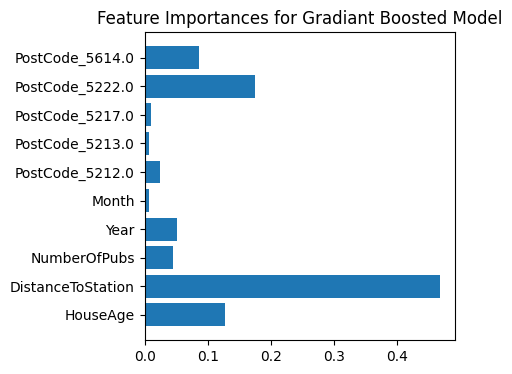

In [106]:
plt.figure(figsize=(4,4))
plt.title('Feature Importances for Gradiant Boosted Model')
plt.barh(ensemble.feature_names_in_, ensemble.feature_importances_)
plt.show()

The distance to station is the most important feature when prdeicting the House price \
The Month of the transaction is not important when predicting the House Price

### Callculate Feature Importance for all Models

In [107]:
import numpy as np

In [108]:
coef_ = fit_models['ridge'].best_estimator_[1].coef_
metrics = np.square(coef_) / np.sum(np.square(coef_))

In [109]:
np.sum(metrics)

0.9999999999999999

In [110]:
feature_importances = {}

for algo, pipeline in fit_models.items():
    if algo == 'ridge':
        # Callculate alternative metric
        coef_ = pipeline.best_estimator_[1].coef_
        feature_importances[algo] = np.square(coef_) / np.sum(np.square(coef_))
    else:
        feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_    

In [111]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13654067, 0.44480542, 0.0558051 , 0.05105018, 0.03467832,
        0.00889441, 0.00286812, 0.01178319, 0.16630518, 0.08726942]),
 'gb': array([0.12746063, 0.46766598, 0.04520525, 0.05182623, 0.00621196,
        0.02393967, 0.00641648, 0.00967549, 0.17486052, 0.08673781]),
 'xg': array([0.03207528, 0.07127062, 0.02292063, 0.05411822, 0.00475283,
        0.09275293, 0.02268689, 0.04478648, 0.41193107, 0.24270506],
       dtype=float32)}

In [112]:
importance_df = pd.DataFrame(feature_importances, index=ensemble.feature_names_in_)
importance_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.136541,0.127461,0.032075
DistanceToStation,0.101874,0.444805,0.467666,0.071271
NumberOfPubs,0.031097,0.055805,0.045205,0.022921
Year,0.038686,0.051050,0.051826,0.054118
Month,0.000006,0.034678,0.006212,0.004753
PostCode_5212.0,0.225705,0.008894,0.023940,0.092753
PostCode_5213.0,0.094727,0.002868,0.006416,0.022687
PostCode_5217.0,0.016941,0.011783,0.009675,0.044786
PostCode_5222.0,0.392286,0.166305,0.174861,0.411931
PostCode_5614.0,0.082193,0.087269,0.086738,0.242705


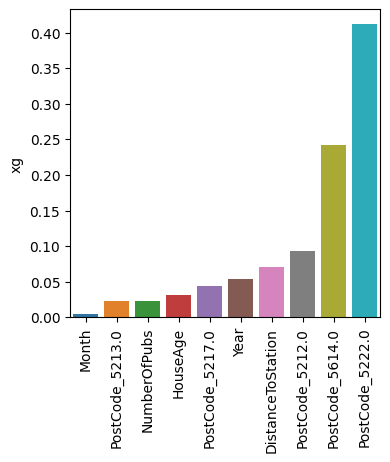

In [113]:
plt.figure(figsize=(4,4))
model_name = 'xg'
sorted_imp = importance_df.sort_values(model_name)
sns.barplot(x=sorted_imp.index, y=model_name, data=sorted_imp)
plt.xticks(rotation=90)
plt.show()

In [114]:
model_names = fit_models.keys()

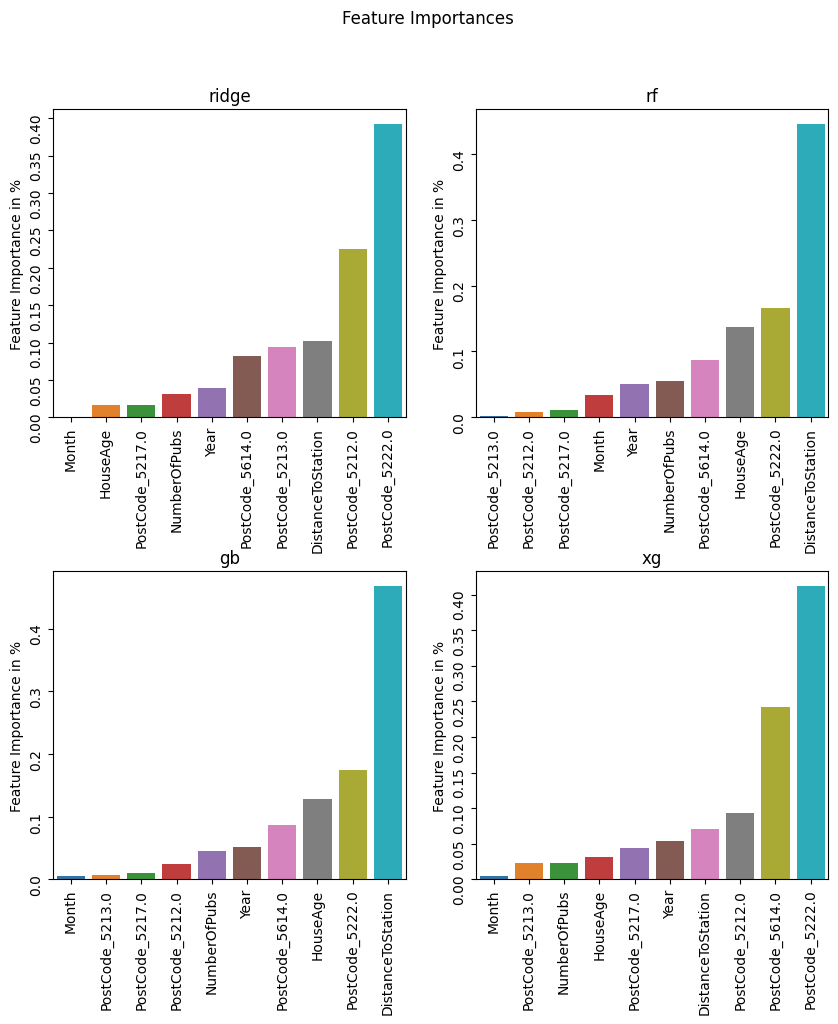

In [115]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Feature Importances')

for model_name, ax in zip(model_names, axs.ravel()):
    sorted_imp = importance_df.sort_values(model_name)
    sns.barplot(x=sorted_imp.index, y=model_name, data=sorted_imp, ax=ax)
    ax.tick_params(labelrotation=90)
    ax.set_ylabel('Feature Importance in %')
    ax.set_title(model_name)
    
plt.show()

### Plot Trees

In [186]:
!pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [116]:
from sklearn.tree import plot_tree
import xgboost as xgb
from matplotlib.pylab import rcParams

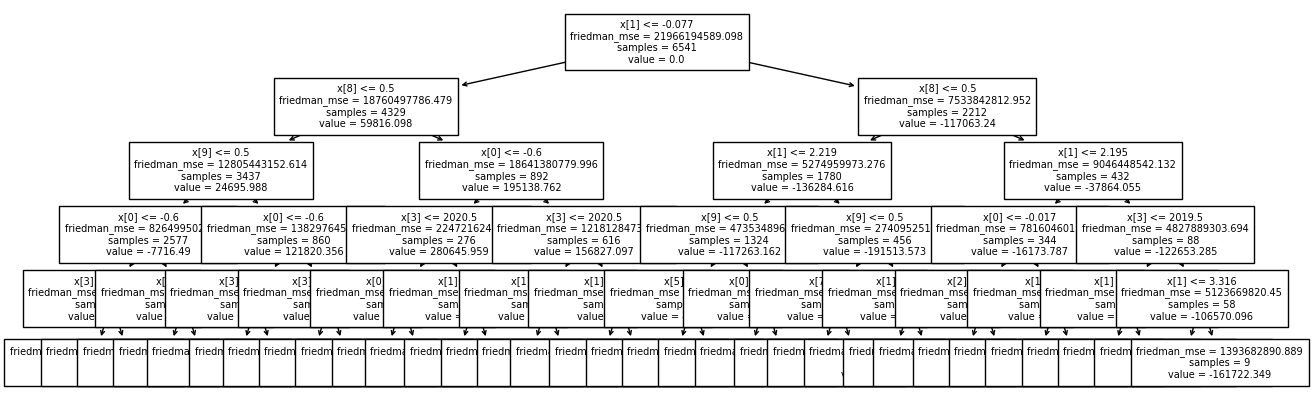

In [117]:
# Plot tree for gradient boosted model
plt.figure(figsize=(15,5))
plot_tree(ensemble.estimators_[0,0], fontsize=7)
plt.show()

In [118]:
ensemble.feature_names_in_[2]

'NumberOfPubs'

In [119]:
X_train.shape

(6541, 5)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

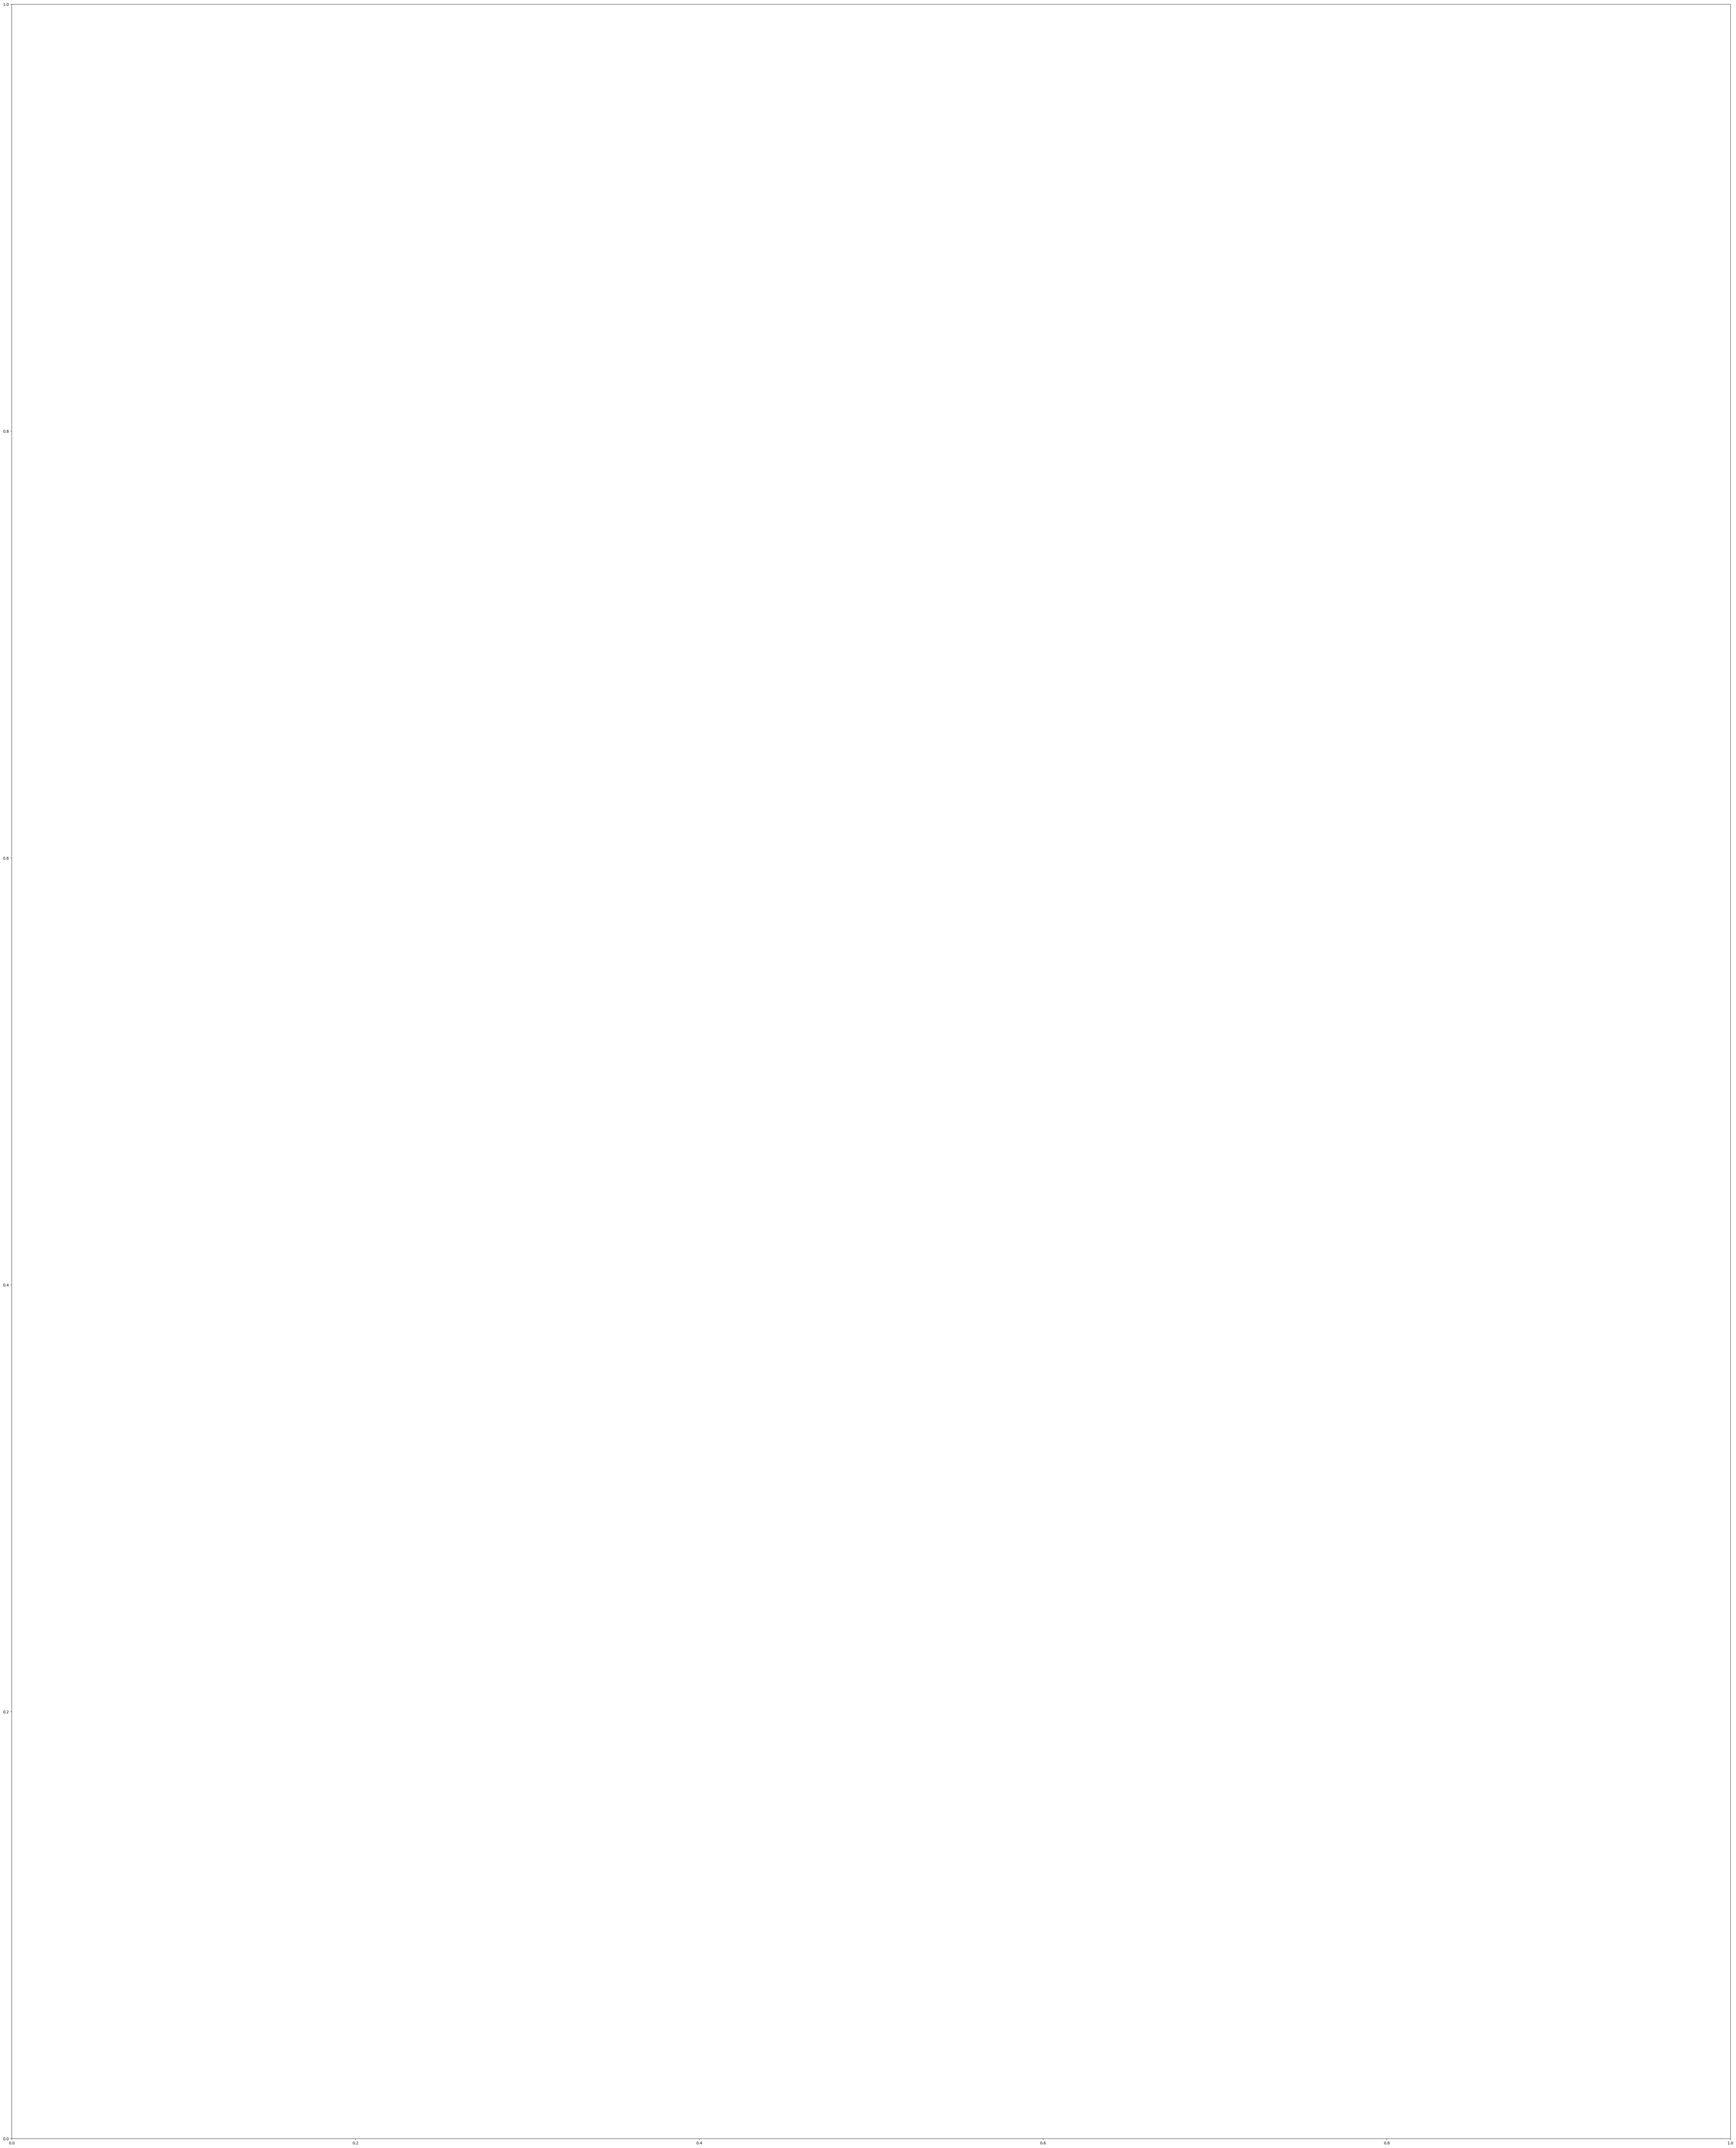

In [120]:
# Plot tree for the xgboost model
rcParams['figure.figsize'] = 80,100
xgb.plot_tree(fit_models['xg'].best_estimator_[1])
plt.show()

# 7. Save Model 

In [121]:
import dill

In [122]:
model = fit_models['gb']

In [123]:
# Save model using dill
with open('gb.pkl', 'wb') as f:
    dill.dump(model, f)

In [124]:
with open('gb.pkl', 'rb') as f:
    reloaded_model = dill.load(f)

In [125]:
reloaded_model.predict(X_test)

array([660072.29726806, 289177.79297644, 166619.49465334, ...,
       392935.05936691, 737461.9967578 , 400940.79244598])

In [126]:
X_test.loc[0].to_json()

'{"TransactionDate":"2020.12","HouseAge":17.0,"DistanceToStation":467.6447748,"NumberOfPubs":4.0,"PostCode":"5222.0"}'